## _*(3, 2, 1/2+$\sqrt{6}/6$)-QRAC*_ 
Namely, encoding three bits into 2 qubits so that any one of three bits can be recovered with probability at least $1/2 + \sqrt{6}/6$
***
### Contributors
Rudy Raymond

## Introduction

The $(3,2)$-QRAC is a protocol to encode 3 bits of information using 2 qubits. The encoding states are as the following.

\begin{eqnarray}
|\psi_{000}\rangle &=& |00\rangle\\ 
|\psi_{001}\rangle &=& \frac{1}{\sqrt{3}}\left(|00\rangle + |01\rangle + |10\rangle \right)\\
|\psi_{010}\rangle &=& \frac{1}{\sqrt{3}}\left(|00\rangle - |01\rangle + |11\rangle \right)\\
|\psi_{011}\rangle &=& |01\rangle\\
|\psi_{100}\rangle &=& \frac{1}{\sqrt{3}}\left(-|00\rangle + |10\rangle + |11\rangle \right)\\
|\psi_{101}\rangle &=& |10\rangle\\
|\psi_{110}\rangle &=& |11\rangle\\
|\psi_{111}\rangle &=& \frac{1}{\sqrt{3}}\left(|01\rangle - |10\rangle + |11\rangle \right)\\
\end{eqnarray}


The decoding of the $(3,2)$-QRAC is the projective measurements as follows.

\begin{eqnarray}
E_{0}^{1} &=& \left\{ \sqrt{p}|00\rangle + \sqrt{\frac{1-p}{2}}\left(|10\rangle + |11\rangle \right),  
-\sqrt{p}|01\rangle + \sqrt{\frac{1-p}{2}}\left(-|10\rangle + |11\rangle \right)\right\}\\
E_{0}^{2} &=& \left\{ -\sqrt{p}|00\rangle + \sqrt{\frac{1-p}{2}}\left(-|01\rangle + |11\rangle \right),  
\sqrt{p}|10\rangle + \sqrt{\frac{1-p}{2}}\left(|01\rangle + |11\rangle \right)\right\}\\
E_{0}^{3} &=& \left\{ -\sqrt{p}|00\rangle + \sqrt{\frac{1-p}{2}}\left(|01\rangle + |10\rangle \right),  
\sqrt{p}|11\rangle + \sqrt{\frac{1-p}{2}}\left(-|01\rangle + |10\rangle \right)\right\}
\end{eqnarray}

Here $p \equiv 1/2 + \sqrt{6}/6$, which is the success probability of obtaining the correct bit. We can check the success probability by numpy. 

In [1]:
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")

# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# useful math functions
from math import pi, cos, acos, sqrt

# importing the QISKit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, register, get_backend

try:
    import Qconfig
    qx_config = {
        "APItoken": Qconfig.APItoken,
        "url": Qconfig.config['url']}
except:
    import getpass
    APItoken = getpass.getpass('Please input your token and hit enter: ')
    qx_config = {
        "APItoken": APItoken,
        "url":"https://quantumexperience.ng.bluemix.net/api"}
    
# import basic plot tools
from qiskit.tools.visualization import plot_histogram

Please input your token and hit enter: ········


We check the success probability by calculating the projections of encoding by the decoding. 

In [2]:
encoding = dict()
encoding["000"] = np.array( [1., 0., 0. , 0. ] )
encoding["001"] = (1.0/sqrt(3.)) * np.array( [1., 1., 1., 0.] )
encoding["010"] = (1.0/sqrt(3.)) * np.array( [1., -1., 0., 1.] ) 
encoding["011"] = np.array( [0., 1., 0., 0.] )
encoding["100"] = (1.0/sqrt(3.)) * np.array( [-1., 0., 1., 1.] )
encoding["101"] = np.array( [0., 0., 1., 0.] )
encoding["110"] = np.array( [0., 0., 0., 1.] )
encoding["111"] = (1.0/sqrt(3.)) * np.array( [0., 1., -1., 1.] )

p = 1.0/2.0 + sqrt(6)/6.0
decoding = dict()
decoding["First"] = [ np.array( [sqrt(p), 0, sqrt((1-p)/2.), sqrt((1-p)/2.)] ) , 
                     np.array( [0, -sqrt(p), -sqrt((1-p)/2.), sqrt((1-p)/2.)] ) ]
decoding["Second"] = [ np.array( [-sqrt(p), -sqrt((1-p)/2.), 0, sqrt((1-p)/2.)] ) , 
                      np.array( [0, sqrt((1-p)/2.), sqrt(p), sqrt((1-p)/2.)] ) ]
decoding["Third"] = [ np.array( [-sqrt(p), sqrt((1-p)/2.), sqrt((1-p)/2.), 0] ) , 
                     np.array( [0, -sqrt((1-p)/2.), sqrt((1-p)/2.), sqrt(p)] ) ]

The succes probabilities of observing "0" by each pair of encoding and decoding are:

In [3]:
print("Theoretical success probability:", p)
for k1 in encoding.keys():
    for k2 in decoding.keys():
        succProb = 0.0
        for v in decoding[k2]:
            succProb += np.sum(v*encoding[k1])**2
        print("Encoding ", k1, " , Decoding ", k2, " obtaining 0 w.p. ", succProb, ", and 1 w.p. ", 1.0-succProb)
    print()

Theoretical success probability: 0.9082482904638629
Encoding  000  , Decoding  First  obtaining 0 w.p.  0.9082482904638629 , and 1 w.p.  0.0917517095361371
Encoding  000  , Decoding  Second  obtaining 0 w.p.  0.9082482904638629 , and 1 w.p.  0.0917517095361371
Encoding  000  , Decoding  Third  obtaining 0 w.p.  0.9082482904638629 , and 1 w.p.  0.0917517095361371

Encoding  001  , Decoding  First  obtaining 0 w.p.  0.9082482904638632 , and 1 w.p.  0.09175170953613676
Encoding  001  , Decoding  Second  obtaining 0 w.p.  0.9082482904638632 , and 1 w.p.  0.09175170953613676
Encoding  001  , Decoding  Third  obtaining 0 w.p.  0.09175170953613686 , and 1 w.p.  0.9082482904638631

Encoding  010  , Decoding  First  obtaining 0 w.p.  0.9082482904638632 , and 1 w.p.  0.09175170953613676
Encoding  010  , Decoding  Second  obtaining 0 w.p.  0.09175170953613686 , and 1 w.p.  0.9082482904638631
Encoding  010  , Decoding  Third  obtaining 0 w.p.  0.9082482904638632 , and 1 w.p.  0.09175170953613676



We can see that each bit can be retrieved with success probability $p \approx 0.908$. Now, we work on designing circuits to realize the above $(3,2)$-QRAC. 

## Circuits of $(3,2)$-QRAC

The core of the encoding circuits is how to create the following superposition.
$$
\frac{1}{\sqrt{3}} \left( |00\rangle + |01\rangle + |10\rangle \right)
$$

We can create it by the following series of transformation.

$$
|00\rangle \xrightarrow{u3} \frac{\sqrt{2}}{\sqrt{3}}|00\rangle + \frac{1}{\sqrt{3}}|10\rangle \xrightarrow{cH}  \frac{1}{\sqrt{3}} \left( |00\rangle + |01\rangle + |10\rangle \right)
$$

The phase can be adjusted by using controlled-Z. Similarly, the core of decoding circuits is how to create the following superposition. 

$$
\sqrt{p}|00\rangle + \sqrt{\frac{1-p}{2}}\left(|10\rangle + |11\rangle \right)
$$

We can create it by the following series of transformation.

$$
|00\rangle \xrightarrow{u3} \sqrt{p} |00\rangle + \sqrt{1-p} |10\rangle \xrightarrow{cH}  \sqrt{p} |00\rangle + \frac{\sqrt{1-p}}{\sqrt{2}} \left( |10\rangle + |11\rangle \right)
$$

However, because we must perform measurement in the standard computational basis, what we need is a circuit that perform the inverse of the transformation above.

Here is the encoding circuits by IBM Q. 

In [4]:
def ch(qProg, a, b):
    """ Controlled-Hadamard gate """
    qProg.h(b)
    qProg.sdg(b)
    qProg.cx(a, b)
    qProg.h(b)
    qProg.t(b)
    qProg.cx(a, b)
    qProg.t(b)
    qProg.h(b)
    qProg.s(b)
    qProg.x(b)
    qProg.s(a)
    return qProg

def encoding000(qProg, a, b):
    return qProg

def encoding011(qProg, a, b):
    qProg.x(b)
    return qProg

def encoding101(qProg, a, b):
    qProg.x(a)
    return qProg
    
def encoding110(qProg, a, b):
    qProg.x(a)
    qProg.x(b)
    return qProg

p = 1.0/2.0 + sqrt(6.0)/6.0 
theta1 = 2.0*acos(sqrt(1.0/3.0))
theta2 = 2.0*acos(sqrt(2.0/3.0))

lambda1 = 2.0*acos(sqrt(p))
lambda2 = 2.0*acos(sqrt(1.0-p))


def encoding001(qProg, a, b):
    qProg.u3(theta2, 0, 0, a)
    qProg.x(a)
    qProg = ch(qProg, a, b)
    qProg.x(a)
    return qProg
    
def encoding010(qProg, a, b):
    qProg.u3(theta2, 0, 0, a)
    qProg.x(b)
    qProg.x(a)
    qProg = ch(qProg, a, b)
    qProg.x(a)
    return qProg

def encoding100(qProg, a, b):
    qProg.u3(theta1, 0, 0, a)
    qProg = ch(qProg, a, b)
    qProg.x(a)
    qProg.x(b)
    qProg.cz(a, b)
    qProg.x(a)
    qProg.x(b)
    return qProg

def encoding111(qProg, a, b):
    qProg.u3(theta1, 0, 0, a)
    qProg.x(b)
    qProg = ch(qProg, a, b)
    qProg.cx(a, b)
    return qProg

The inverse of controlled-Hadamard is controlled-Hadamard, and the inverse of $u3(\theta, 0, 0)$ is $u3(2\pi - \theta, 0, 0)$. So, we have the following decoding circuits. 

In [5]:
def decodingFirst(qProg, a, b, cbit):
    """ the following circuit is the inverse of 
    u3_1(lambda1, 0, 0) --> cH(1,2)
    |00> is mapped to the first measurement basis
    |01> is mapped to the second measurement basis
    """
    qProg = ch(qProg, a, b)
    qProg.u3(2*pi - lambda1, 0, 0, a)
    qProg.measure(a, cbit) #measurement
    return qProg

def decodingSecond(qProg, a, b, cbit):
    """ the following circuit is the inverse of
    SWAP(1,2) --> u3_2(lambda1, 0, 0) --> cH(2,1) --> cZ(1,2)
    |00> is mapped to the first measurement basis
    |01> is mapped to the second measurement basis
    """
    qProg.cz(a, b)
    qProg = ch(qProg, b, a)
    qProg.u3(2*pi - lambda1, 0, 0, b)
    qProg.cx(a, b)
    qProg.cx(b, a)
    qProg.cx(a, b)
    qProg.measure(a, cbit) #measurement
    return qProg

lambda3 = 2.0*acos(-sqrt(p))
def decodingThird(qProg, a, b, cbit):
    """ the following circuit is the inverse of
    SWAP(1,2) --> u3_2(lambda3, 0, 0) --> cH(2,1) --> cx(1,2)
    """
    qProg.cx(a, b)
    qProg = ch(qProg, b, a)
    qProg.u3(2*pi - lambda3, 0, 0, b)
    qProg.cx(a, b)
    qProg.cx(b, a)
    qProg.cx(a, b)
    qProg.measure(a, cbit)#measurement
    return qProg

Having defined the encoding and decoding circuits, we can now experiment with simulator and real devices.

## Experimenting with Simulators

(3,2)-QRAC for  Encoding000DecodingFirst


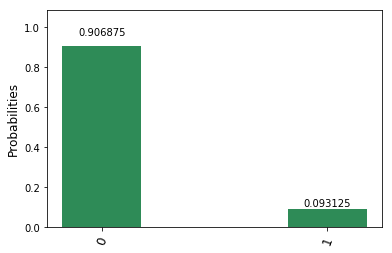

(3,2)-QRAC for  Encoding000DecodingSecond


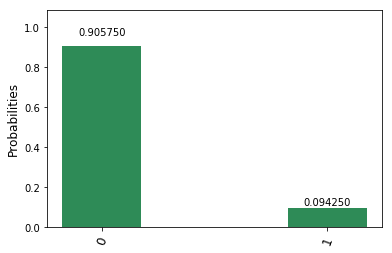

(3,2)-QRAC for  Encoding000DecodingThird


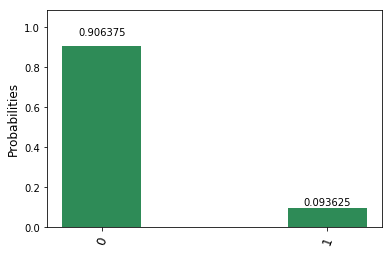

(3,2)-QRAC for  Encoding001DecodingFirst


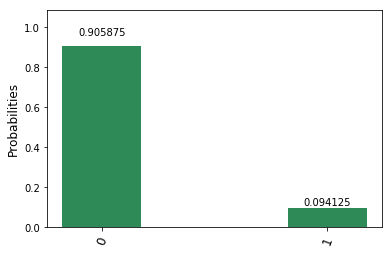

(3,2)-QRAC for  Encoding001DecodingSecond


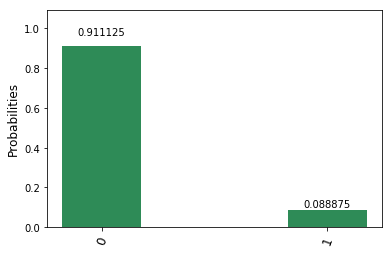

(3,2)-QRAC for  Encoding001DecodingThird


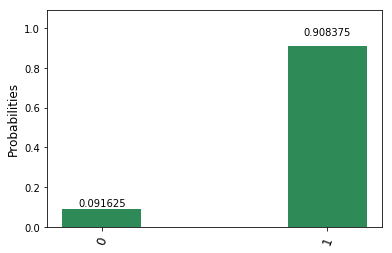

(3,2)-QRAC for  Encoding010DecodingFirst


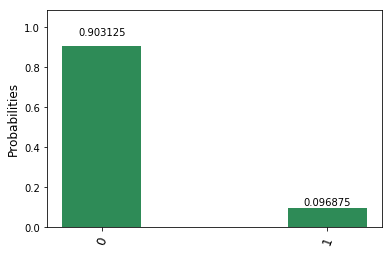

(3,2)-QRAC for  Encoding010DecodingSecond


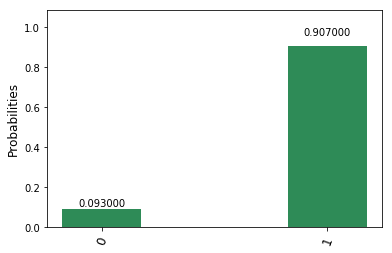

(3,2)-QRAC for  Encoding010DecodingThird


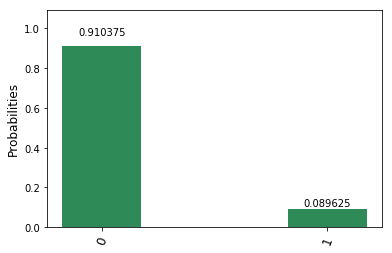

(3,2)-QRAC for  Encoding011DecodingFirst


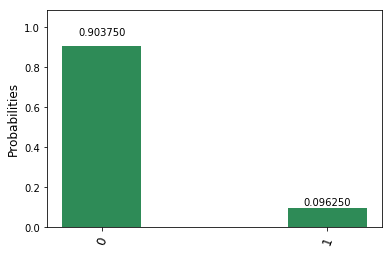

(3,2)-QRAC for  Encoding011DecodingSecond


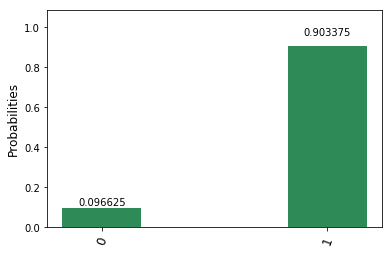

(3,2)-QRAC for  Encoding011DecodingThird


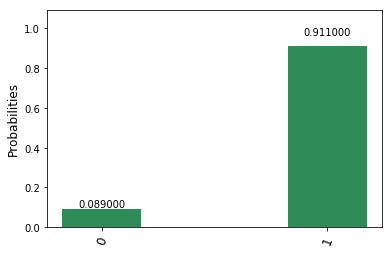

(3,2)-QRAC for  Encoding100DecodingFirst


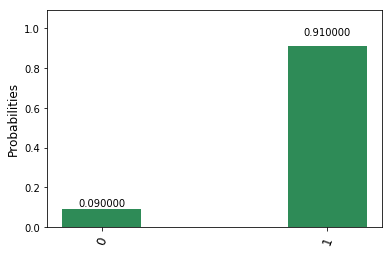

(3,2)-QRAC for  Encoding100DecodingSecond


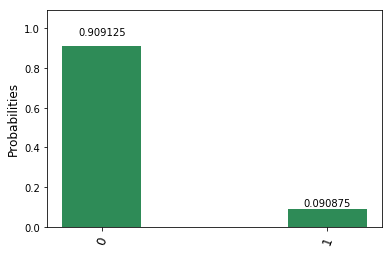

(3,2)-QRAC for  Encoding100DecodingThird


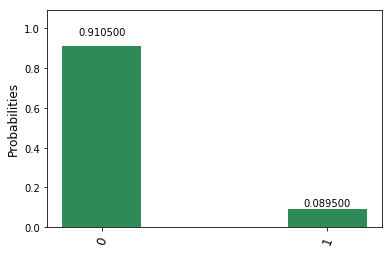

(3,2)-QRAC for  Encoding101DecodingFirst


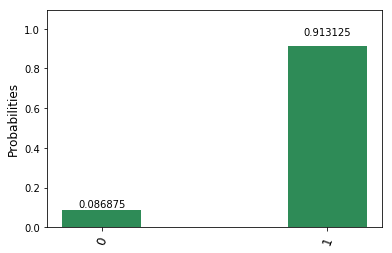

(3,2)-QRAC for  Encoding101DecodingSecond


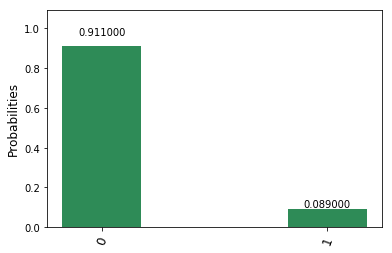

(3,2)-QRAC for  Encoding101DecodingThird


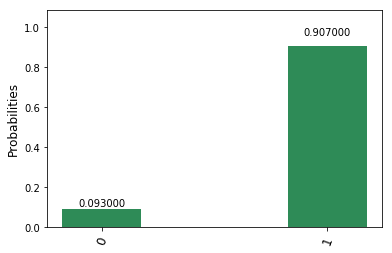

(3,2)-QRAC for  Encoding110DecodingFirst


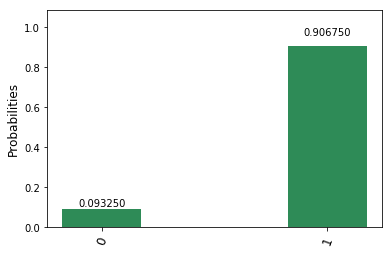

(3,2)-QRAC for  Encoding110DecodingSecond


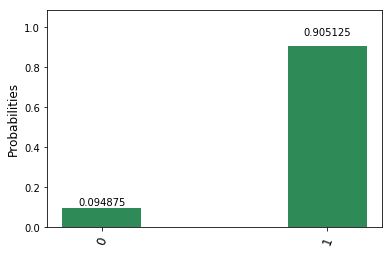

(3,2)-QRAC for  Encoding110DecodingThird


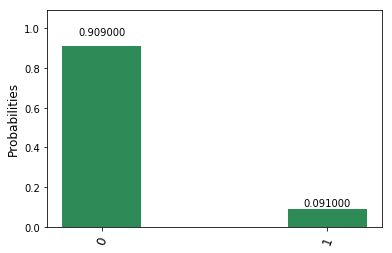

(3,2)-QRAC for  Encoding111DecodingFirst


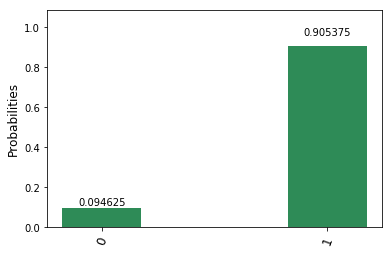

(3,2)-QRAC for  Encoding111DecodingSecond


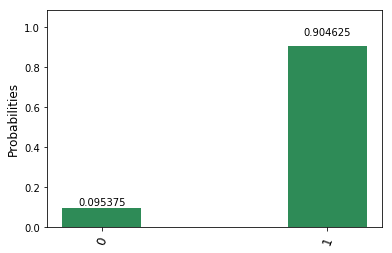

(3,2)-QRAC for  Encoding111DecodingThird


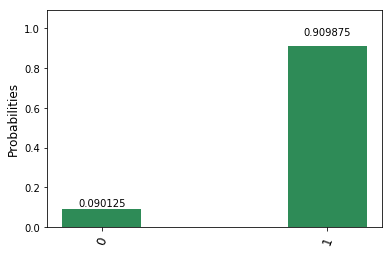

In [6]:
# Creating registers
# qubits for encoding 7 bits of information with qr[0] kept by the sender
qr = QuantumRegister(2)
# bits for recording the measurement. we  only need 1 bit of information at a time
cr = ClassicalRegister(1)

encodingFunctions = {
    "000": encoding000,
    "001": encoding001,
    "010": encoding010,
    "011": encoding011,
    "100": encoding100,
    "101": encoding101,
    "110": encoding110,
    "111": encoding111
}

decodingFunctions = {
    "First": decodingFirst,
    "Second": decodingSecond,
    "Third": decodingThird
}

circuitNames = []
circuits = []
for xstring in encodingFunctions.keys():
    for pos in decodingFunctions.keys():
        circuitName = "Encoding"+xstring+"Decoding"+pos    
        aCircuit = QuantumCircuit(qr, cr, name=circuitName)
        aCircuit = encodingFunctions[xstring](aCircuit, qr[0], qr[1])
        aCircuit = decodingFunctions[pos](aCircuit, qr[0], qr[1], cr[0])
        circuits.append(aCircuit)
        circuitNames.append(circuitName)
        
backend = "local_qasm_simulator"
shots = 8000

job = execute(circuits, backend=backend, shots=shots)
results = job.result()
for i, each in enumerate(circuitNames):
    print("(3,2)-QRAC for ", each)
    plot_histogram(results.get_counts(circuits[i]))

## Experimenting with Real Devices

We first list all available real-device backends.

In [7]:
register(qx_config["APItoken"], qx_config["url"]) #need to register the token to use real-device backends
list_of_backends = available_backends({'local': False, 'simulator': False})
print(list_of_backends)

['ibmq_16_rueschlikon', 'ibmq_5_tenerife', 'ibmq_5_yorktown']


Noting that `ibmqx5` is available, we use it to perform experiments on $(3,2)$-QRACs.

Status @ 0 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 10 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 84}
Status @ 20 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 84}
Status @ 30 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 84}
Status @ 40 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 84}
Status @ 50 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 84}
Status @ 60 seconds
{'job_id': '5b3f4fbd34d1

Status @ 520 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 63}
Status @ 530 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 63}
Status @ 540 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 63}
Status @ 550 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 63}
Status @ 560 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 60}
Status @ 570 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 60}
Status @ 580 seconds
{'job_id': '5b3f4fb

Status @ 1040 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 39}
Status @ 1050 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 39}
Status @ 1060 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 39}
Status @ 1070 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 39}
Status @ 1080 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 39}
Status @ 1090 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 39}
Status @ 1100 seconds
{'job_id': '

Status @ 1550 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 15}
Status @ 1560 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 15}
Status @ 1570 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 15}
Status @ 1580 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 15}
Status @ 1590 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 12}
Status @ 1600 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 12}
Status @ 1610 seconds
{'job_id': '

Status @ 2070 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': 'job is actively running'}
Status @ 2080 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': 'job is actively running'}
Status @ 2090 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': 'job is actively running'}
Status @ 2100 seconds
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': 'job is actively running'}
{'job_id': '5b3f4fbd34d1a900432db630', 'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': 'job has successfully run'}
REAL-DEVICE: (3,2)-QRAC for  Encoding000DecodingFirst


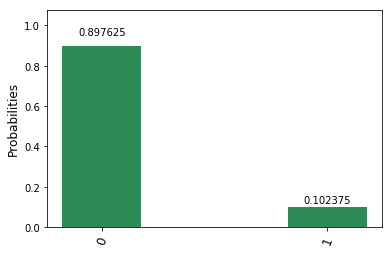

REAL-DEVICE: (3,2)-QRAC for  Encoding000DecodingSecond


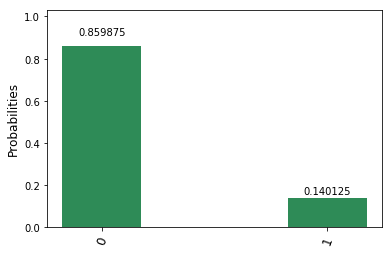

REAL-DEVICE: (3,2)-QRAC for  Encoding000DecodingThird


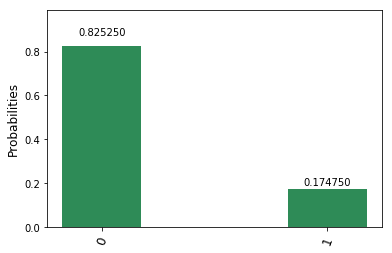

REAL-DEVICE: (3,2)-QRAC for  Encoding001DecodingFirst


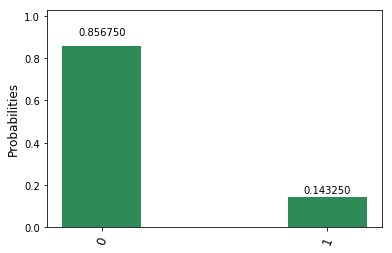

REAL-DEVICE: (3,2)-QRAC for  Encoding001DecodingSecond


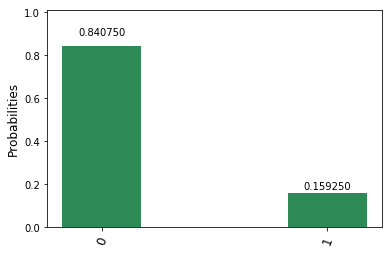

REAL-DEVICE: (3,2)-QRAC for  Encoding001DecodingThird


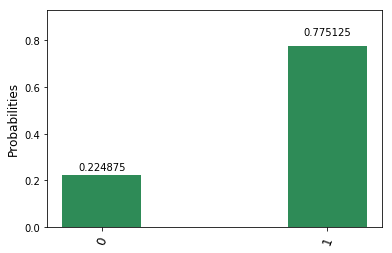

REAL-DEVICE: (3,2)-QRAC for  Encoding010DecodingFirst


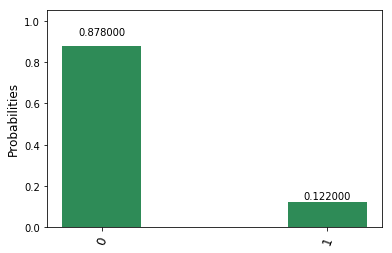

REAL-DEVICE: (3,2)-QRAC for  Encoding010DecodingSecond


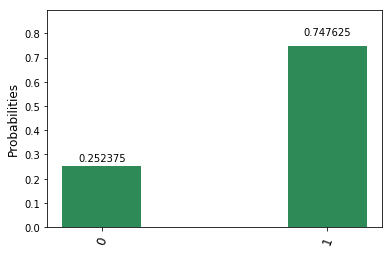

REAL-DEVICE: (3,2)-QRAC for  Encoding010DecodingThird


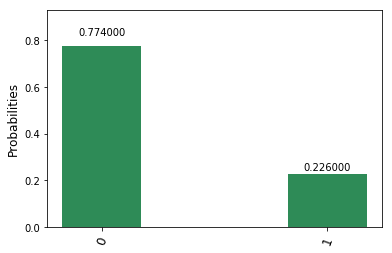

REAL-DEVICE: (3,2)-QRAC for  Encoding011DecodingFirst


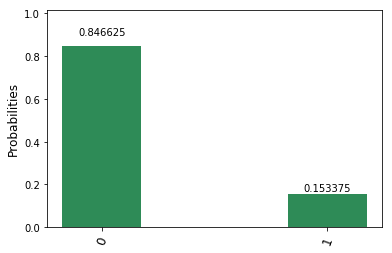

REAL-DEVICE: (3,2)-QRAC for  Encoding011DecodingSecond


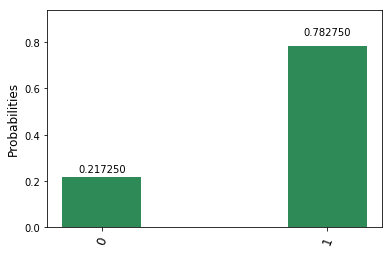

REAL-DEVICE: (3,2)-QRAC for  Encoding011DecodingThird


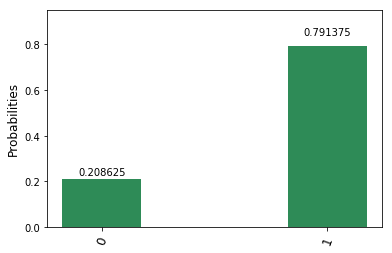

REAL-DEVICE: (3,2)-QRAC for  Encoding100DecodingFirst


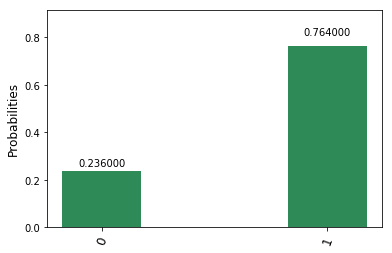

REAL-DEVICE: (3,2)-QRAC for  Encoding100DecodingSecond


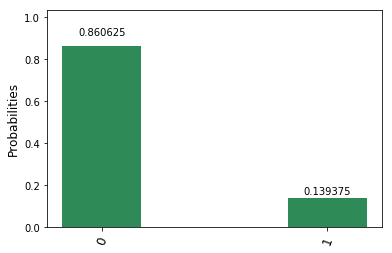

REAL-DEVICE: (3,2)-QRAC for  Encoding100DecodingThird


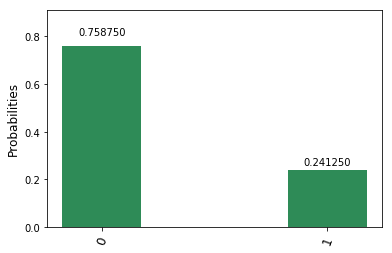

REAL-DEVICE: (3,2)-QRAC for  Encoding101DecodingFirst


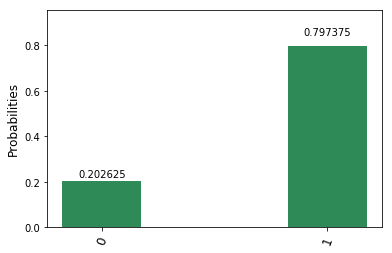

REAL-DEVICE: (3,2)-QRAC for  Encoding101DecodingSecond


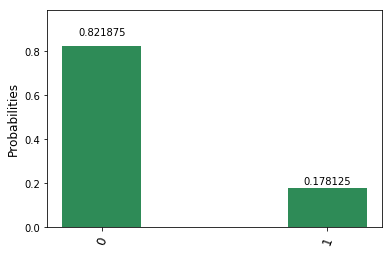

REAL-DEVICE: (3,2)-QRAC for  Encoding101DecodingThird


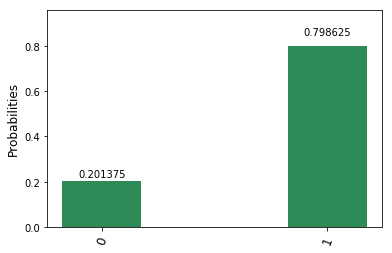

REAL-DEVICE: (3,2)-QRAC for  Encoding110DecodingFirst


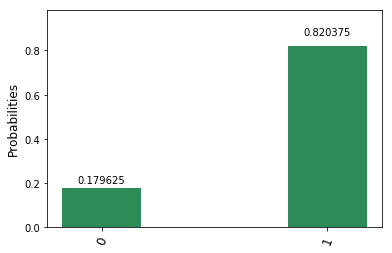

REAL-DEVICE: (3,2)-QRAC for  Encoding110DecodingSecond


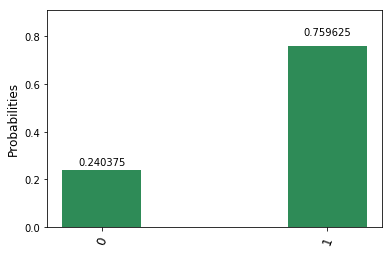

REAL-DEVICE: (3,2)-QRAC for  Encoding110DecodingThird


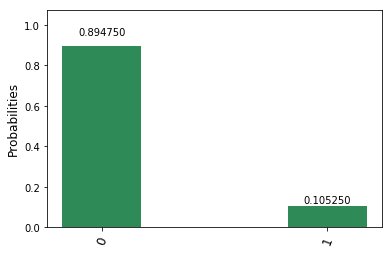

REAL-DEVICE: (3,2)-QRAC for  Encoding111DecodingFirst


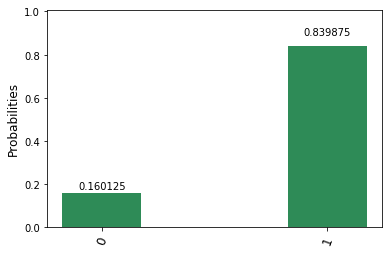

REAL-DEVICE: (3,2)-QRAC for  Encoding111DecodingSecond


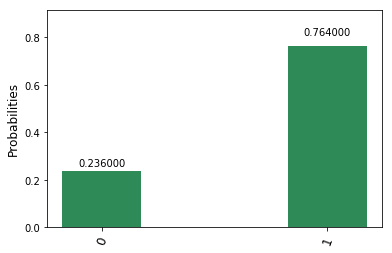

REAL-DEVICE: (3,2)-QRAC for  Encoding111DecodingThird


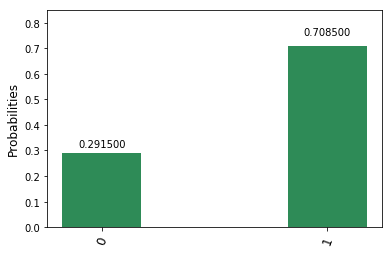

In [8]:
import time

backend = "ibmq_5_tenerife"
shots = 8000

job_exp = execute(circuits, backend=backend, shots=shots, max_credits=100)

lapse = 0
interval = 10
while not job_exp.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job_exp.status)
    time.sleep(interval)
    lapse += 1
print(job_exp.status)

results = job_exp.result()
for i, each in enumerate(circuitNames):
    print("REAL-DEVICE: (3,2)-QRAC for ", each)
    plot_histogram(results.get_counts(circuits[i]))

## About Quantum Random Access Coding
$(n, m)$-QRACs exist for $ n \le 2^{2m}-1$ that can be realized with mixed states as shown [here](http://link.springer.com/chapter/10.1007/978-3-540-73420-8_12).

In [9]:
!pip show qiskit

Name: qiskit
Version: 0.5.6
Summary: Software for developing quantum computing programs
Home-page: https://github.com/QISKit/qiskit-terra
Author: QISKit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /Users/rraymondhp/miniconda3/envs/QISKitenv/lib/python3.6/site-packages
Requires: numpy, networkx, matplotlib, IBMQuantumExperience, pillow, ply, sympy, scipy
Required-by: 
